In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading values and properties

In [2]:
df = pd.read_csv('../csvs/computers-laptops.csv')

In [3]:
df.head()

,product_name,product_price,product_discount_price,voucher_amount,availability
0,Riversong Nexus P8 Multifunction Type-C Dockin...,219.00,NaN,0,True
1,Riversong Nexus P11 Multifunction Type-C Docki...,299.00,NaN,0,True
2,Samsung 32GB EVO Plus microSD Card with SD Ada...,39.00,NaN,50,True
3,Apple USB-C to USB Adapter,99.00,NaN,0,True
4,Apple USB-C VGA Multiport Adapter,349.00,NaN,0,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            121 non-null    object
 1   product_price           113 non-null    object
 2   product_discount_price  6 non-null      object
 3   voucher_amount          121 non-null    int64 
 4   availability            121 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 4.0+ KB


In [5]:
df.isna().sum()

product_name                0
product_price               8
product_discount_price    115
voucher_amount              0
availability                0
dtype: int64

#### Cleaning noises from column values

In [6]:
df['product_price'] = df['product_price'].str.replace(',', '').astype(float)

In [7]:
df['product_discount_price'] = df['product_discount_price'].str.replace('RM ', '').astype(float)

In [8]:
df['product_brand'] = df['product_name'].str.split().str[0]

#### Uniforming column values

In [9]:
df['product_brand'].apply(str.upper)

0      RIVERSONG
1      RIVERSONG
2        SAMSUNG
3          APPLE
4          APPLE
         ...    
116           HP
117    MICROSOFT
118        APPLE
119         ASUS
120        CANON
Name: product_brand, Length: 121, dtype: object

In [10]:
df['product_discount_price'] = df['product_discount_price'].fillna(0)

In [11]:
df[['product_name', 'product_brand', 'product_price', 'product_discount_price', 'voucher_amount', 'availability']]

,product_name,product_brand,product_price,product_discount_price,voucher_amount,availability
0,Riversong Nexus P8 Multifunction Type-C Dockin...,Riversong,219.0,0.0,0,True
1,Riversong Nexus P11 Multifunction Type-C Docki...,Riversong,299.0,0.0,0,True
2,Samsung 32GB EVO Plus microSD Card with SD Ada...,Samsung,39.0,0.0,50,True
3,Apple USB-C to USB Adapter,Apple,99.0,0.0,0,True
4,Apple USB-C VGA Multiport Adapter,Apple,349.0,0.0,0,True
...,...,...,...,...,...,...
116,HP Laptop 15-FC0083AU (AMD Ryzen™ 5 7530U|16GB...,HP,2599.0,0.0,0,False
117,Microsoft Surface Laptop Go 3 (Intel™ i5-1235U...,Microsoft,4099.0,0.0,0,False
118,"Apple MacBook Pro (14-Inch, M3, 2023)",Apple,NaN,0.0,0,False
119,ASUS TUF Gaming F15 FX506H-EHN062W (Intel® Cor...,ASUS,3699.0,0.0,0,False


#### Visualizing Data

In [12]:
df.groupby('product_brand').agg({
    'product_price': ['min', 'max', 'mean', 'median']
})

product_price                              
                        min      max         mean  median
product_brand                                            
ACER                 5499.0   5499.0  5499.000000  5499.0
ASUS                  299.0   3699.0  2386.500000  2774.0
Acer                 2299.0   4799.0  3374.000000  3199.0
Apple                  99.0  14799.0  2462.076923   489.0
Boomwave              132.0    132.0   132.000000   132.0
Canon                 209.0    780.0   433.750000   387.0
Cento                  69.0     69.0    69.000000    69.0
Future                149.0    749.0   349.000000   149.0
HONOR                2299.0   2299.0  2299.000000  2299.0
HP                    199.0   3799.0  2927.750000  3249.0
Lightning              55.0     55.0    55.000000    55.0
Logitech               65.0    489.0   186.400000   119.0
MSI                    70.0   6399.0   863.538462   370.0
Mi                   2199.0   2199.0  2199.000000  2199.0
Microsoft             159.0   9399.0  1894.925926   599.0
Promate                85.0    139.0   112.000000   112.0
Rapoo                  19.0     19.0    19.000000    19.0
Riversong             219.0    299.0   259.000000   259.0
Samsung                39.0     39.0    39.000000    39.0
TP-Link                79.0   1099.0   429.000000   274.0
Xiaomi                799.0    799.0   799.000000   799.0
[Bundle]              899.0    899.0   899.000000   899.0

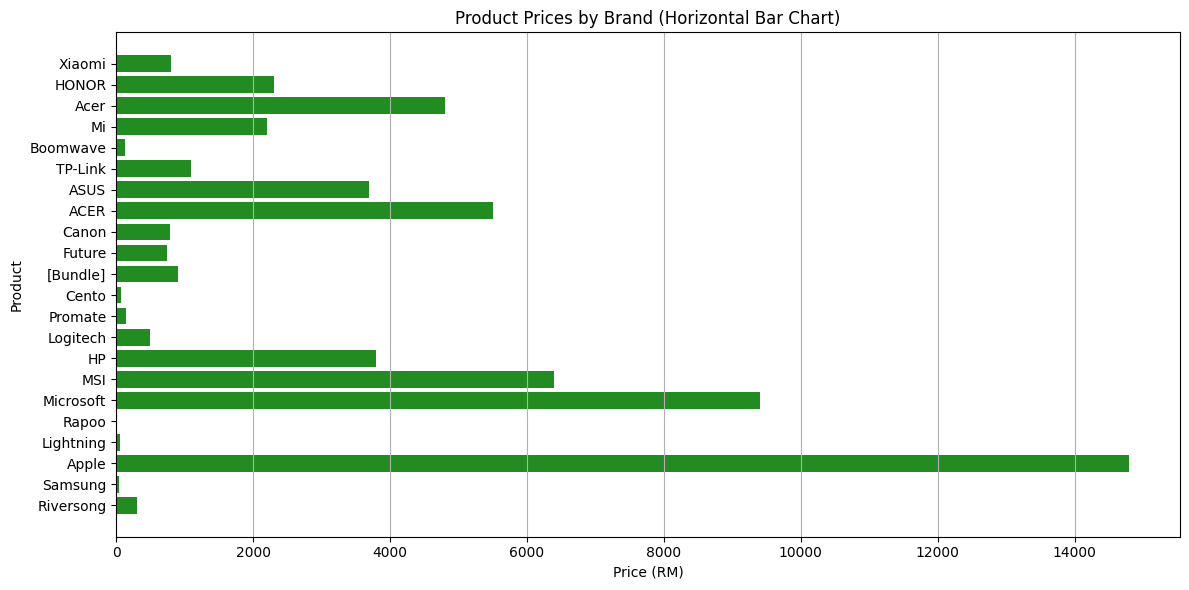

In [13]:
plt.figure(figsize=(12, 6))
plt.barh(df['product_brand'], df['product_price'], color='forestgreen')
plt.xlabel('Price (RM)')
plt.ylabel('Product')
plt.title('Product Prices by Brand (Horizontal Bar Chart)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

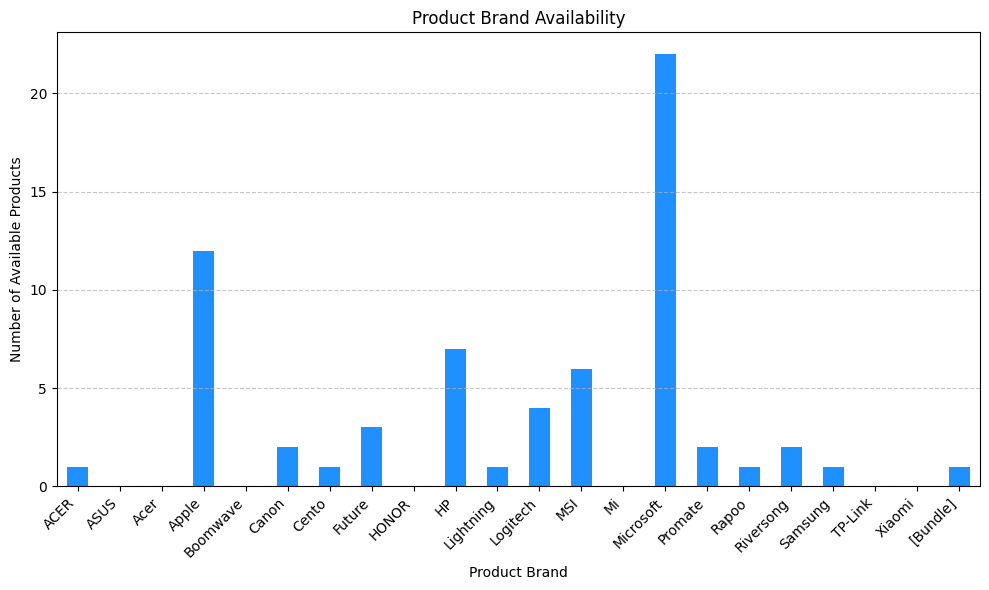

In [14]:
plt.figure(figsize=(10, 6))
df.groupby('product_brand')['availability'].sum().plot(kind='bar', color='dodgerblue')
plt.title('Product Brand Availability')
plt.xlabel('Product Brand')
plt.ylabel('Number of Available Products')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

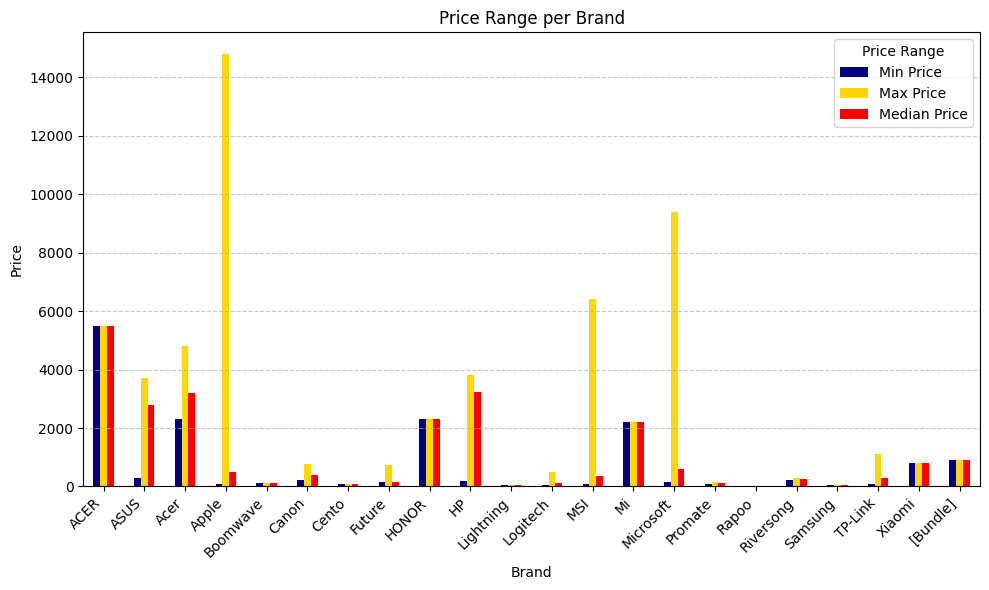

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('product_brand')['product_price'].agg(['min', 'max', 'median']). \
    plot(kind='bar', stacked=False, color=['navy', 'gold', 'red'], ax=ax)
plt.title('Price Range per Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(['Min Price', 'Max Price', 'Median Price'], title='Price Range')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

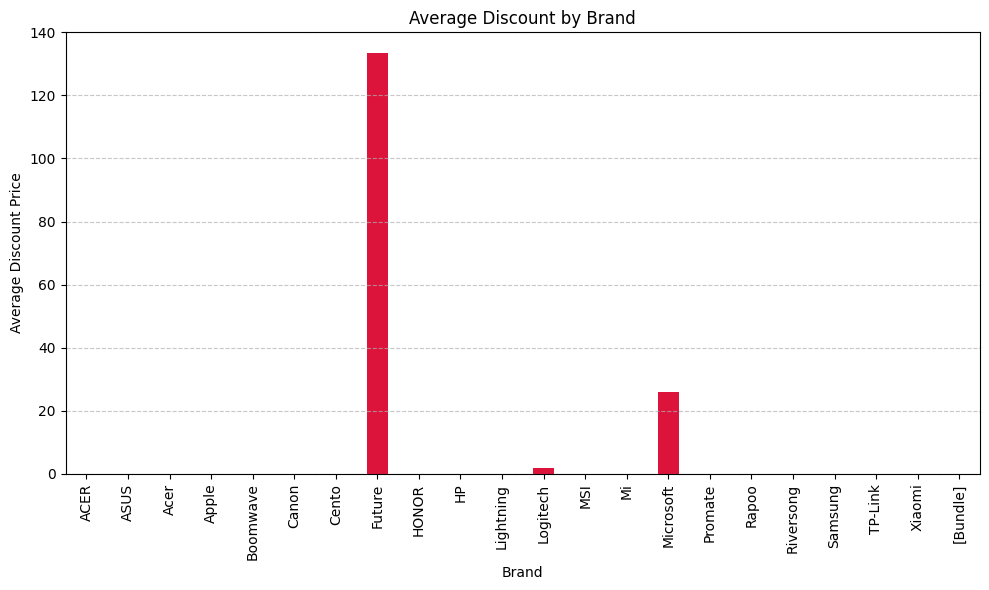

In [16]:
plt.figure(figsize=(10, 6))
df.groupby('product_brand')['product_discount_price'].mean().plot(kind='bar', color='crimson')
plt.title('Average Discount by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discount Price')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

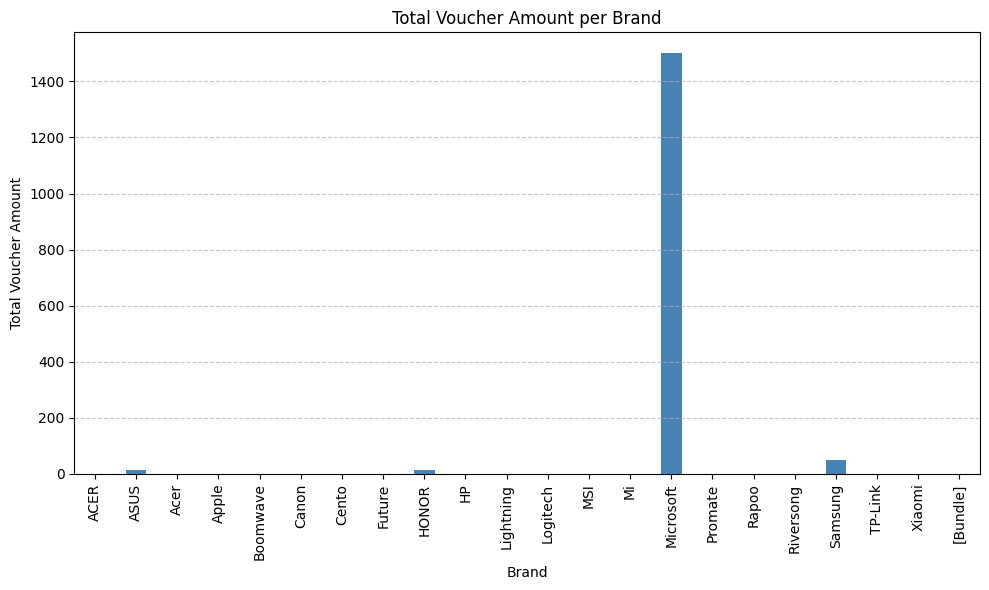

In [17]:
plt.figure(figsize=(10, 6))
df.groupby('product_brand')['voucher_amount'].sum().plot(kind='bar', color='steelblue')
plt.title('Total Voucher Amount per Brand')
plt.xlabel('Brand')
plt.ylabel('Total Voucher Amount')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()